In [1]:
!pip install -q predibase datasets

& was unexpected at this time.
The value specified in an AutoRun registry key could not be parsed.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 4.37.2 requires urllib3~=2.0, but you have urllib3 1.26.12 which is incompatible.


In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
from predibase import Predibase, FinetuningConfig, DeploymentConfig

PREDIBASE_API_KEY = "pb_YOPEoaPZV4C3JmOHR4uyqg" 

api_token: str = PREDIBASE_API_KEY
pb = Predibase(api_token=api_token)

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

Connected to Predibase as User(id=2df77ee8-ea8c-4636-82cd-3ab7be4b1056, username=abusalek877@gmail.com)

In [3]:
from datasets import load_dataset
import csv

def hfdataset_to_csv(datalist: list, csv_file_name, max=-1):
  template = {
        "prompt":
        """<|im_start|>system\nYou are a law expert. Based on the given question, generate a single line answer concisely.  <|im_end|>
<|im_start|>Question\n {content}
<|im_start|>Answer\n""",
        "completion": "{headline}<|im_end|>",
        "split": "train"}


  with open(csv_file_name, 'w', newline='') as csvfile:
    fieldnames = template.keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for i, d in enumerate(datalist):
      if i >= max:
        break
      row = {
          "prompt": template["prompt"].format(content=d["Question"]),
          "completion": template["completion"].format(headline=d["Answer"]),
          "split": "train"
      }
      writer.writerow(row)

In [4]:
def validate_data_csv(csv_file_name):
  """ Make sure it has prompt, completion, and split with all values """
  with open(csv_file_name, 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
      assert row['prompt']
      assert row['completion']
      assert row['split']

  return True

In [5]:
from tokenizers import Tokenizer
tokenizer = Tokenizer.from_pretrained("upstage/solar-1-mini-tokenizer")

def compute_cost(csv_file_name, price_per_million_tokens=0.5):
  """ Compute the cost of the dataset """

  total_num_of_tokens = 0
  with open(csv_file_name, 'r') as f:
    reader = csv.DictReader(f)
    # get all values
    values = [row['completion']+ " " + row['prompt'] for row in reader]
    for value in values:
      # tokenize
      enc = tokenizer.encode(value)
      num_of_tokens = len(enc.tokens)
      total_num_of_tokens += num_of_tokens


  return total_num_of_tokens / 1000000 * price_per_million_tokens

In [6]:
from datasets import load_dataset, Dataset
from sklearn.model_selection import train_test_split

# Load the dataset
hfdataset = load_dataset("csv", data_files="japan_business_law.csv")
train_hfdataset = hfdataset["train"]
print(train_hfdataset)
# Convert the dataset to a pandas DataFrame for easier manipulation
train_df = train_hfdataset.to_pandas()

# Split the train dataset into 80% train and 20% test
train_split, test_split = train_test_split(train_df, test_size=0.1, random_state=42)

train_split.reset_index(drop=True, inplace=True)
test_split.reset_index(drop=True, inplace=True)

# Convert back to the Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_split)
test_dataset = Dataset.from_pandas(test_split)

# Print the sizes of the new datasets
print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(train_dataset)

Dataset({
    features: ['Question', 'Answer'],
    num_rows: 677
})
Train dataset size: 609
Test dataset size: 68
Dataset({
    features: ['Question', 'Answer'],
    num_rows: 609
})


In [7]:
dataset_name = "JBL2_train_dataset"
csv_file_name = f"{dataset_name}.csv"
try:
  pb_dataset = pb.datasets.get(dataset_name)
  print(f"Dataset found: {pb_dataset}")
except RuntimeError:
  print("Dataset not found, creating...")

  hfdataset_to_csv(train_dataset, csv_file_name, max=1321)

  print(f"Dataset Validation: {validate_data_csv(csv_file_name)}")
  print(f"One step FT Cost: {compute_cost(csv_file_name)} USD")

  #print("Uploading daatset...")
  pb_dataset = pb.datasets.from_file(csv_file_name, name=dataset_name)

Dataset not found, creating...
Dataset Validation: True
One step FT Cost: 0.027381 USD


WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

WARN: Currently installed SDK is outdated. This can lead to bugs or unexpected behavior. Consider upgrading to the 
latest version. Installed: 2024.7.2 Latest: 2024.8.3.

In [8]:
repo_name = "JBL-01"
repo = pb.repos.create(name=repo_name, description="Upstage_Hackathon_JBL_Adapter", exists_ok=True)
print(repo)

uuid='fa265004-3b66-48e7-a104-dfd3612c399a' name='JBL-01' description='Upstage_Hackathon_KBL_Adapter'


In [9]:
adapter = pb.adapters.create(
    config=FinetuningConfig(
        base_model="solar-1-mini-chat-240612",
        epochs=3, # default: 3
        rank=16, # default: 16
    ),
    dataset=pb_dataset, # Also accepts the dataset name as a string
    repo=repo,
    description="initial model with defaults"
)

Successfully requested finetuning of solar-1-mini-chat-240612 as `JBL-01/2`. (Job UUID: 39f17153-ec01-428e-9805-8e82f75cc19e).

Watching progress of finetuning job 39f17153-ec01-428e-9805-8e82f75cc19e. This call will block until the job has finished. Canceling or terminating this call will NOT cancel or terminate the job itself.

Job is starting. Total queue time: 0:00:45         
Waiting to receive training metrics...

┌────────────┬────────────┬─────────────────┐
│ checkpoint │ train_loss │ validation_loss │
├────────────┼────────────┼─────────────────┤
│     1      │   1.1551   │        --       │
│     2      │   1.8780   │        --       │
│     3      │   0.2603   │        --       │
└────────────┴────────────┴─────────────────┘


In [10]:
adapter

Adapter(repo='JBL-01', tag=2, archived=False, base_model='solar-1-mini-chat-240612', description='initial model with defaults', artifact_path='39f17153-ec01-428e-9805-8e82f75cc19e/5028b93ba9c84a68b60baaa95e01898a/artifacts/model/model_weights', finetuning_error=None, finetuning_job_uuid='39f17153-ec01-428e-9805-8e82f75cc19e')

In [11]:
adapter_id = adapter.repo + "/" + str(adapter.tag)
adapter_id

'JBL-01/2'

In [12]:
input_prompt="""
<|im_start|>system\nYou are an bunisee law expert. Based on the given question, generate a single line answer concisely..<|im_end|>
<|im_start|>Question
What is the website address for the Korean branch of PwC? <|im_end|>
<|im_start|>Answer
"""


In [13]:
# CURL test
import requests
import json

url = "https://serving.app.predibase.com/7ea6d0/deployments/v2/llms/solar-1-mini-chat-240612/generate"


payload = {
    "inputs": input_prompt,
    "parameters": {
        "adapter_id": adapter_id,
        "adapter_source": "pbase",
        "max_new_tokens": 60,
        "temperature": 0.1
    }
}

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_token}"
}

response = requests.post(url, data=json.dumps(payload), headers=headers)

print(response.text)

{"generated_text":"The website address for the Korean branch of PwC is <http://www.pwckorea.com>."}


In [15]:
!pip -q install langchain langchain-upstage solar-as-judge

& was unexpected at this time.
The value specified in an AutoRun registry key could not be parsed.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 4.37.2 requires urllib3~=2.0, but you have urllib3 1.26.12 which is incompatible.


In [14]:
import os

import solar_as_judge as saj

os.environ["UPSTAGE_API_KEY"] = "up_6F8vdbehr2EHCp9a8rnVBUzA6yLgd"
prompt = "Please extract important keyword from this text: I love you so much"
ground_truth = "love"
A_answer = "love"
B_answer = "so much"

a_score, b_score = saj.judge(prompt, A_answer, B_answer, ground_truth)
print(a_score, b_score)


10 2


In [15]:
lorax_client = pb.deployments.client("solar-1-mini-chat-240612")

In [16]:
# Create test dataset
test_csv_file_name = f"JBL_test_dataset"
hfdataset_to_csv(test_dataset, test_csv_file_name, max=147)

win_results = {"A_wins":0, "B_wins": 0, "tie": 0,  "A_score": 0, "B_score": 0}
with open(test_csv_file_name, 'r') as f:
  reader = csv.DictReader(f)
  for row in reader:
    prompt = row['prompt']
    ground_truth = row['completion']
    A_answer = lorax_client.generate(prompt, max_new_tokens=1000).generated_text
    B_answer = lorax_client.generate(prompt, adapter_id=adapter_id, max_new_tokens=1000).generated_text

    A_score, B_score = saj.judge(prompt, A_answer, B_answer, ground_truth)
    print( A_score, B_score, A_answer, B_answer)
    win_results["A_score"] += A_score
    win_results["B_score"] += B_score
    if A_score > B_score:
      win_results["A_wins"] += 1
    elif B_score > A_score:
      win_results["B_wins"] += 1
    else:
      win_results["tie"] += 1
    print(win_results)


2 6 The examination process in Japan typically takes around 2-3 years. The examination process usually takes about 1.5 years.
{'A_wins': 0, 'B_wins': 1, 'tie': 0, 'A_score': 2, 'B_score': 6}
10 2 No enterprise tax The enterprise tax on a pro forma basis for corporations with 100 million yen or less paid-in capital is 250,000 yen.
{'A_wins': 1, 'B_wins': 1, 'tie': 0, 'A_score': 12, 'B_score': 8}
8 6 In Japan, the following documents are typically required for certification regarding equity participants:

1. Articles of Incorporation (or similar organizational documents)
2. Resolution(s) authorizing the equity participation
3. Copy of the company's registration certificate (if applicable)
4. Proof of identity and address for the equity participant(s)
5. Any other documents required by the specific company or industry regulations. Documents regarding equity participants in Japan include a copy of the certificate of incorporation, a copy of the latest balance sheet, a list of major shareho

In [ ]:
print(win_results)

{'A_wins': 37, 'B_wins': 35, 'tie': 75, 'A_score': 471, 'B_score': 454}


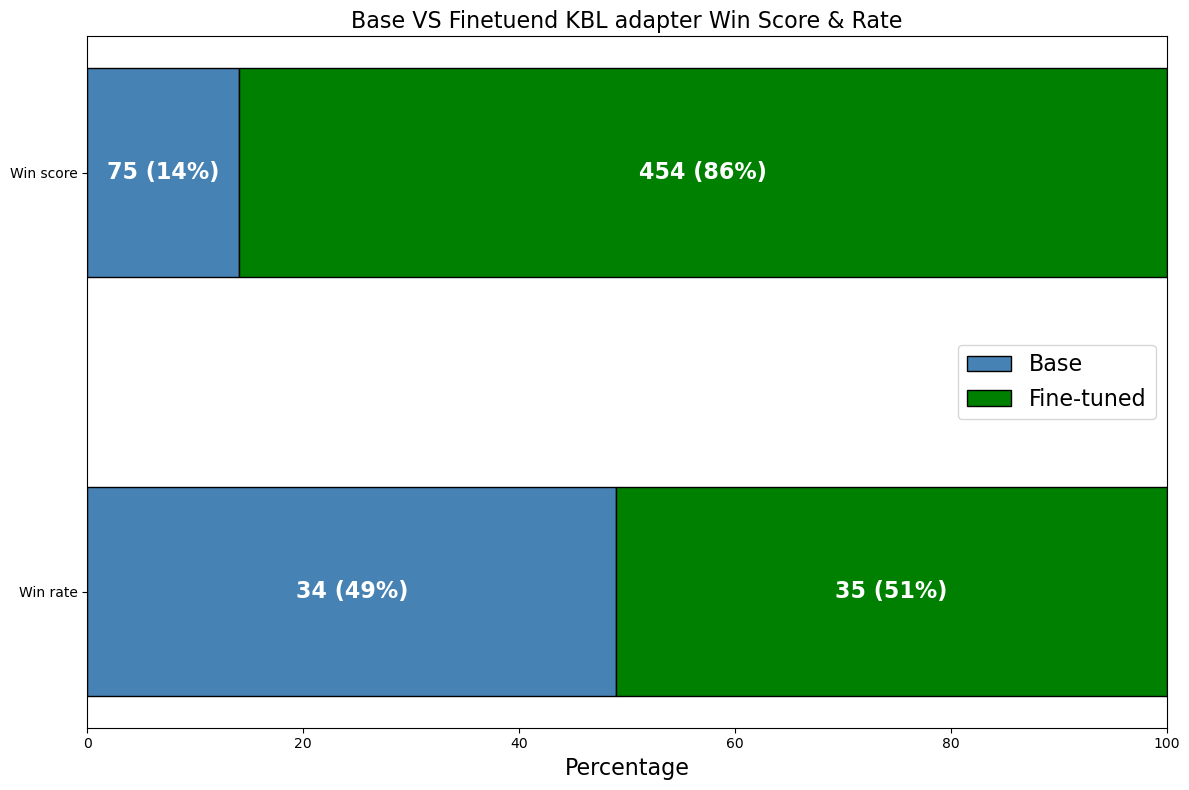

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Updated sample data
win_results = {'A_wins': 34, 'B_wins': 35, 'tie': 75, 'A_score': 75, 'B_score': 454}
categories = ["Win rate", "Win score"]
win_rate_sum = win_results["A_wins"] + win_results["B_wins"]
win_score_sum = win_results["A_score"] + win_results["B_score"]

percentages1 = [round(win_results["A_wins"]*100/win_rate_sum), round(win_results["A_score"]*100/win_score_sum)]
percentages2 = [round(win_results["B_wins"]*100/win_rate_sum), round(win_results["B_score"]*100/win_score_sum)]
values1 = [win_results["A_wins"], win_results["A_score"]]
values2 = [win_results["B_wins"], win_results["B_score"]]

# Create a bar plot

# Bar positions
bar_width = 0.5
y_pos = np.arange(len(categories))

# Plotting the bars
fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(y_pos, percentages1, color='steelblue', edgecolor='black', height=bar_width, label='Base')
ax.barh(y_pos, percentages2, left=percentages1, color='green', edgecolor='black', height=bar_width, label='Fine-tuned')

# Adding text
for i in range(len(categories)):
    ax.text(percentages1[i]/2, i, f"{values1[i]} ({percentages1[i]}%)", ha='center', va='center', color='white', fontweight='bold',fontsize=16)
    ax.text(percentages1[i] + percentages2[i]/2, i, f"{values2[i]} ({percentages2[i]}%)", ha='center', va='center', color='white', fontweight='bold',fontsize=16)

# Labels and Titles
ax.set_yticks(y_pos)
ax.set_yticklabels(categories)
ax.set_xlim(0, 100)
ax.set_xlabel('Percentage', fontsize=16)
ax.set_title('Base VS Finetuend JBL adapter Win Score & Rate',fontsize=16)
ax.legend(loc='best', fontsize=16)

# Save the figure with 300 DPI and tight layout
plt.tight_layout()
plt.savefig('win_comparison_chart_JBL.png', dpi=300)
plt.show()
